In [129]:
import pandas as pd
import numpy as np
import os

In [130]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [131]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-23--16h-02m-52s',
 '2025-05-23--16h-02m-56s',
 '2025-05-23--16h-03m-00s',
 '2025-05-23--16h-03m-03s',
 '2025-05-23--16h-03m-07s',
 '2025-05-23--16h-03m-11s',
 '2025-05-23--16h-03m-15s',
 '2025-05-23--16h-03m-18s',
 '2025-05-23--16h-03m-22s',
 '2025-05-23--16h-03m-26s',
 '2025-05-23--16h-03m-30s',
 '2025-05-23--16h-03m-34s',
 '2025-05-23--16h-03m-37s',
 '2025-05-23--16h-03m-41s',
 '2025-05-23--16h-03m-45s',
 '2025-05-23--16h-03m-49s',
 '2025-05-23--16h-03m-53s',
 '2025-05-23--16h-03m-56s',
 '2025-05-23--16h-04m-00s',
 '2025-05-23--16h-04m-04s',
 '2025-05-23--16h-04m-08s',
 '2025-05-23--16h-04m-12s',
 '2025-05-23--16h-04m-15s',
 '2025-05-23--16h-04m-19s',
 '2025-05-23--16h-04m-23s',
 '2025-05-23--16h-04m-27s',
 '2025-05-23--16h-04m-31s',
 '2025-05-23--16h-04m-34s',
 '2025-05-23--16h-04m-38s',
 '2025-05-23--16h-04m-42s',
 '2025-05-23--16h-04m-46s',
 '2025-05-23--16h-04m-49s',
 '2025-05-23--16h-04m-53s',
 '2025-05-23--16h-04m-57s',
 '2025-05-23--16h-05m-01s',
 '2025-05-23--16h-05

In [132]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,theta_estimate,delta_phi_estimate,data_dir,theta,delta_phi
0,84.283041,10.931373,2025-05-23--16h-02m-52s,1.570796,0.000000
1,85.248565,10.934607,2025-05-23--16h-02m-56s,1.570796,0.026624
2,84.815539,10.849747,2025-05-23--16h-03m-00s,1.570796,0.053247
3,84.740237,11.120988,2025-05-23--16h-03m-03s,1.570796,0.079871
4,85.132891,11.574571,2025-05-23--16h-03m-07s,1.570796,0.106495
5,84.997485,11.965047,2025-05-23--16h-03m-11s,1.570796,0.133118
6,84.626581,12.559549,2025-05-23--16h-03m-15s,1.570796,0.159742
7,84.958163,12.908751,2025-05-23--16h-03m-18s,1.570796,0.186366
8,84.142229,14.657389,2025-05-23--16h-03m-22s,1.570796,0.212989
9,84.530540,15.838605,2025-05-23--16h-03m-26s,1.570796,0.239613


In [133]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,theta_estimate,delta_phi_estimate,data_dir,theta,delta_phi,theta_degrees,delta_phi_degrees
0,84.283041,10.931373,2025-05-23--16h-02m-52s,1.570796,0.000000,90.0,0.000000
1,85.248565,10.934607,2025-05-23--16h-02m-56s,1.570796,0.026624,90.0,1.525424
2,84.815539,10.849747,2025-05-23--16h-03m-00s,1.570796,0.053247,90.0,3.050847
3,84.740237,11.120988,2025-05-23--16h-03m-03s,1.570796,0.079871,90.0,4.576271
4,85.132891,11.574571,2025-05-23--16h-03m-07s,1.570796,0.106495,90.0,6.101695
5,84.997485,11.965047,2025-05-23--16h-03m-11s,1.570796,0.133118,90.0,7.627119
6,84.626581,12.559549,2025-05-23--16h-03m-15s,1.570796,0.159742,90.0,9.152542
7,84.958163,12.908751,2025-05-23--16h-03m-18s,1.570796,0.186366,90.0,10.677966
8,84.142229,14.657389,2025-05-23--16h-03m-22s,1.570796,0.212989,90.0,12.203390
9,84.530540,15.838605,2025-05-23--16h-03m-26s,1.570796,0.239613,90.0,13.728814


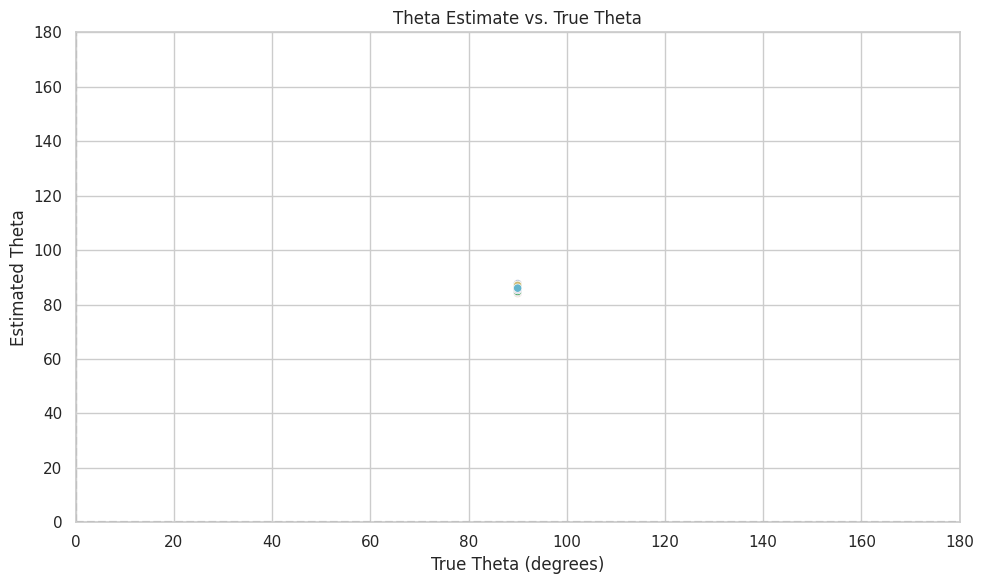

In [134]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta_degrees", y="theta_estimate", hue="data_dir", palette="deep")
plt.title("Theta Estimate vs. True Theta")
plt.xlabel("True Theta (degrees)")
plt.ylabel("Estimated Theta")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, 180)
plt.ylim(0, 180)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

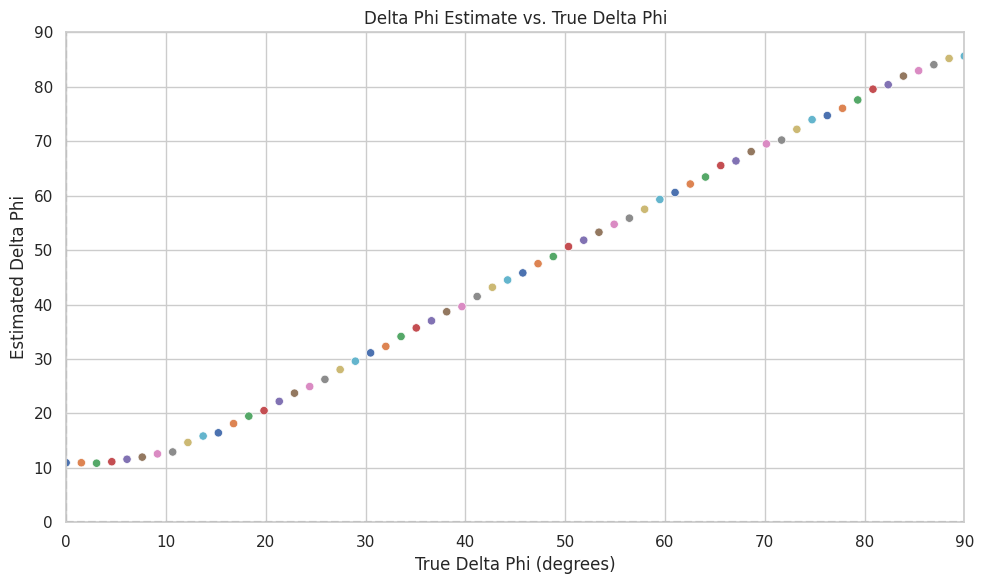

In [135]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi_degrees", y="delta_phi_estimate", hue="data_dir", palette="deep")
plt.title("Delta Phi Estimate vs. True Delta Phi")
plt.xlabel("True Delta Phi (degrees)")
plt.ylabel("Estimated Delta Phi")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, 90)
plt.ylim(0, 90)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()